In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kaggle
import seaborn as sns

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
#X, y = datasets.load_iris(return_X_y=True)

In [18]:
iris = datasets.load_iris()

In [19]:
X = iris.data

In [20]:
y = iris.target

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
#print(iris.DESCR)

In [23]:
#print(iris)

In [24]:
y.shape

(150,)

In [25]:
#help(ExtraTreesClassifier)

In [26]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y,train_size=0.75,random_state=42)

In [27]:
clf = RandomForestClassifier(n_estimators=10)

In [28]:
clf.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=10)

In [29]:
clf.score(xTest,yTest)

1.0

In [30]:
yPred  = clf.predict(xTest)

In [31]:
print(f"Extra Trees Classifier  Classification Report:")
print(classification_report(yTest, yPred))

Random Forest  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [32]:
# https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 
cm = confusion_matrix(yTest,yPred)
cm

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [33]:
clf = ExtraTreesClassifier(n_estimators=10)

In [34]:
clf.fit(X,y)

ExtraTreesClassifier(n_estimators=10)

In [35]:
clf.feature_importances_

array([0.03513612, 0.07040683, 0.36048454, 0.53397251])

In [36]:
feature_importances = pd.Series(clf.feature_importances_,index= iris.feature_names).sort_values(ascending=False)
feature_importances.head()

petal width (cm)     0.533973
petal length (cm)    0.360485
sepal width (cm)     0.070407
sepal length (cm)    0.035136
dtype: float64

<AxesSubplot:>

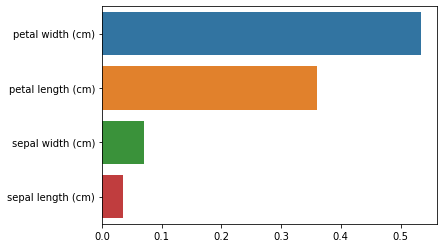

In [37]:
sns.barplot(x=feature_importances,y=feature_importances.index)